In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import signal_statistics as ss

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
activity = pd.read_csv('cycling_20151209.csv', skiprows=5)  # Read in activity file.

In [5]:
activity['ts'] = activity['1']  # Rename column for timestamp.
activity['hr'] = activity['1.1']  # Rename column for heart rate.
activity['smo2'] = activity['1.2']  # Rename column for smo2.

In [6]:
activity = activity[['ts', 'hr', 'smo2']].dropna(how='any')  # Drop NaN values.

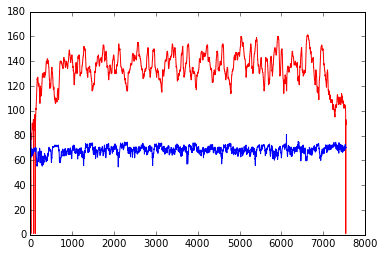

In [7]:
plt.plot(activity['hr'], 'r-', activity['smo2'], 'b-'); plt.show()  # Have a look at the data.

In [8]:
print(activity.hr.max(), activity.hr.min(), activity.smo2.max(), activity.smo2.min())

161 1 100.0 54.7


In [9]:
activity = activity[activity.hr > 60]  # Filter for heart rate greater than 50 bpm. 
activity = activity[(activity.smo2 > 50) & (activity.smo2 < 80)]  # Filter for smo2 > 50% and smo2 < 90%.

In [10]:
smo2_delta = (activity.smo2 - activity.smo2.shift(periods=1)).dropna(how='any')
hr_delta = (activity.hr - activity.hr.shift(periods=1)).dropna(how='any')

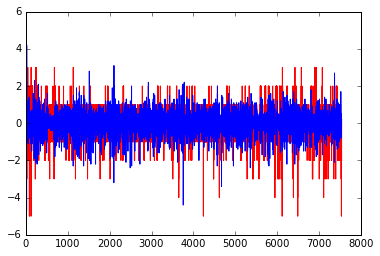

In [11]:
plt.plot(hr_delta, 'r-', smo2_delta, 'b-'); plt.show()

Positive:
1.00 0.329 94.211  85
2.00 0.310 41.366 171
3.00 0.261 17.900 257
5.00 0.224 6.470 343
6.00 0.217 4.635 429
7.00 0.219 4.195 515
8.00 0.203 2.460 601
9.00 0.197 1.762 687
10.00 0.197 1.593 773
11.00 0.194 1.329 859
13.00 0.189 0.898 945
14.00 0.185 0.659 1031
15.00 0.183 0.512 1117
16.00 0.180 0.366 1203
17.00 0.178 0.279 1289
18.00 0.178 0.281 1375
19.00 0.179 0.280 1461
21.00 0.175 0.156 1547
22.00 0.171 0.050 1633
23.00 0.171 0.036 1719
24.00 0.170 0.011 1805
25.00 0.168 -0.034 1891
26.00 0.168 -0.027 1977
27.00 0.168 -0.031 2063
29.00 0.166 -0.080 2149
30.00 0.166 -0.080 2235
31.00 0.164 -0.104 2321
32.00 0.162 -0.140 2407
33.00 0.163 -0.114 2493
34.00 0.163 -0.111 2579
35.00 0.164 -0.095 2665
37.00 0.163 -0.102 2751
38.00 0.162 -0.116 2837
39.00 0.163 -0.108 2923
40.00 0.162 -0.119 3009
41.00 0.160 -0.144 3095
42.00 0.157 -0.175 3181
43.00 0.155 -0.194 3267
45.00 0.157 -0.159 3353
46.00 0.156 -0.176 3439
47.00 0.155 -0.181 3525
48.00 0.154 -0.196 3611
49.00 0.153 -0.202 

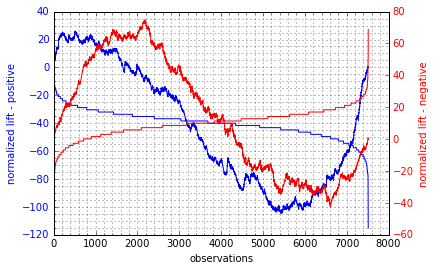

In [12]:
ss.lift(smo2_delta, hr_delta)

In [13]:
ss.roc(smo2_delta, hr_delta)

threshold: 0.0000

Classification probabilities on [0, 1]
FPF: 0.609 TPF: 0.104 tau: 0.183

Predictive values on [0, 1]
PPV: 0.479 NPV: 0.479 rho: 0.843

Diagnostic likelihood ratios on [0, +oo)
DLR+: 0.171 DLR-: 2.291
